In [1]:
import pandas as pd
import numpy as np
import panel as pn
from pmdarima import utils, arima

# Going with the usual approach

## 1. ARIMA

In [2]:
data= pd.read_excel('Data.xlsx')

In [3]:
data[data['DATETIME'].between('01-07-2023 23:00:00','01-08-2023 23:00:00')].head(50)

,DATETIME,value
668,2023-01-07 23:00:00,3225.72
669,2023-01-07 23:15:00,3150.03
670,2023-01-07 23:30:00,2920.86
671,2023-01-07 23:45:00,2700.62
672,2023-01-08 00:00:00,2851.35
673,2023-01-08 00:15:00,2840.63
674,2023-01-08 00:30:00,2820.58
675,2023-01-08 00:45:00,2771.06
676,2023-01-08 01:00:00,2768.63
677,2023-01-08 01:15:00,2768.53


In [4]:
data

,DATETIME,value
0,2023-01-01 00:00:00,2890.56
1,2023-01-01 00:15:00,2771.61
2,2023-01-01 00:30:00,2750.58
3,2023-01-01 00:45:00,2543.42
4,2023-01-01 01:00:00,2543.25
...,...,...
21115,2023-08-08 22:45:00,10000.00
21116,2023-08-08 23:00:00,10000.00
21117,2023-08-08 23:15:00,10000.00
21118,2023-08-08 23:30:00,10000.00


In [6]:
import plotly.graph_objects as go
# Add traces for first subplot
trace = go.Scatter(x=data['DATETIME'], y=data['value'], mode='lines+markers', name='timeseries')
fig = go.Figure(data=[trace])
# Layout details
fig.update_layout(
    height=1000,
    title=f"Interactive Line Plot of {'value'}",
    xaxis=dict(
            title='Datetime',  # Tilt x labels by -45 degrees
            automargin=True  # Automatically adjust margins to fit tilted labels
        ),
    yaxis_title='timeseries',
    autosize= True,
)


### Let us look at the decompositions of this pattern

In [7]:
# Isolating data with full cycles
start= '03.07.2023 03:00:00'
end= '08.08.2023 13:45:00'

In [9]:
timeseries= data[data['DATETIME'].between(start, end)]

In [10]:
timeseries

,DATETIME,value
6252,2023-03-07 03:00:00,4819.02
6253,2023-03-07 03:15:00,4819.47
6254,2023-03-07 03:30:00,4575.60
6255,2023-03-07 03:45:00,4570.74
6256,2023-03-07 04:00:00,4848.38
...,...,...
21075,2023-08-08 12:45:00,2406.34
21076,2023-08-08 13:00:00,2406.01
21077,2023-08-08 13:15:00,2380.84
21078,2023-08-08 13:30:00,2406.86


In [11]:
decomposed= arima.decompose(timeseries['value'].values, 'additive', m=96)

In [12]:
decomposed

decomposed(x=array([4819.02, 4819.47, 4575.6 , ..., 2380.84, 2406.86, 2500.85]), trend=[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5573.121979166666, 5563.7246875, 5554.3309375, 5546.1578125, 5537.793020833333, 5526.5328125, 5515.5509375, 5501.0778125, 5479.5192708333325, 5459.749895833333, 5429.903333333333, 5390.344270833333, 5353.596354166666, 5280.3646874999995, 5198.0990624999995, 5139.025833333333, 5062.879166666666, 4988.4028125, 4915.294583333333, 4839.2614583333325, 4761.6503125, 4722.884479166666, 4679.156666666666, 4642.197395833333, 4608.252083333333, 4583.571249999999, 4558.563854166666, 4533.159062499999, 4507.750729166666, 4474.427708333333, 4441.329791666666, 4413.439375, 4393.671249999999, 4377.312812499999, 4358.561145833333, 4342.209375, 4326.668333333333, 4314.646874999999

Text(0.5, 1.0, 'Ausbeer Seasonal Decomposition')

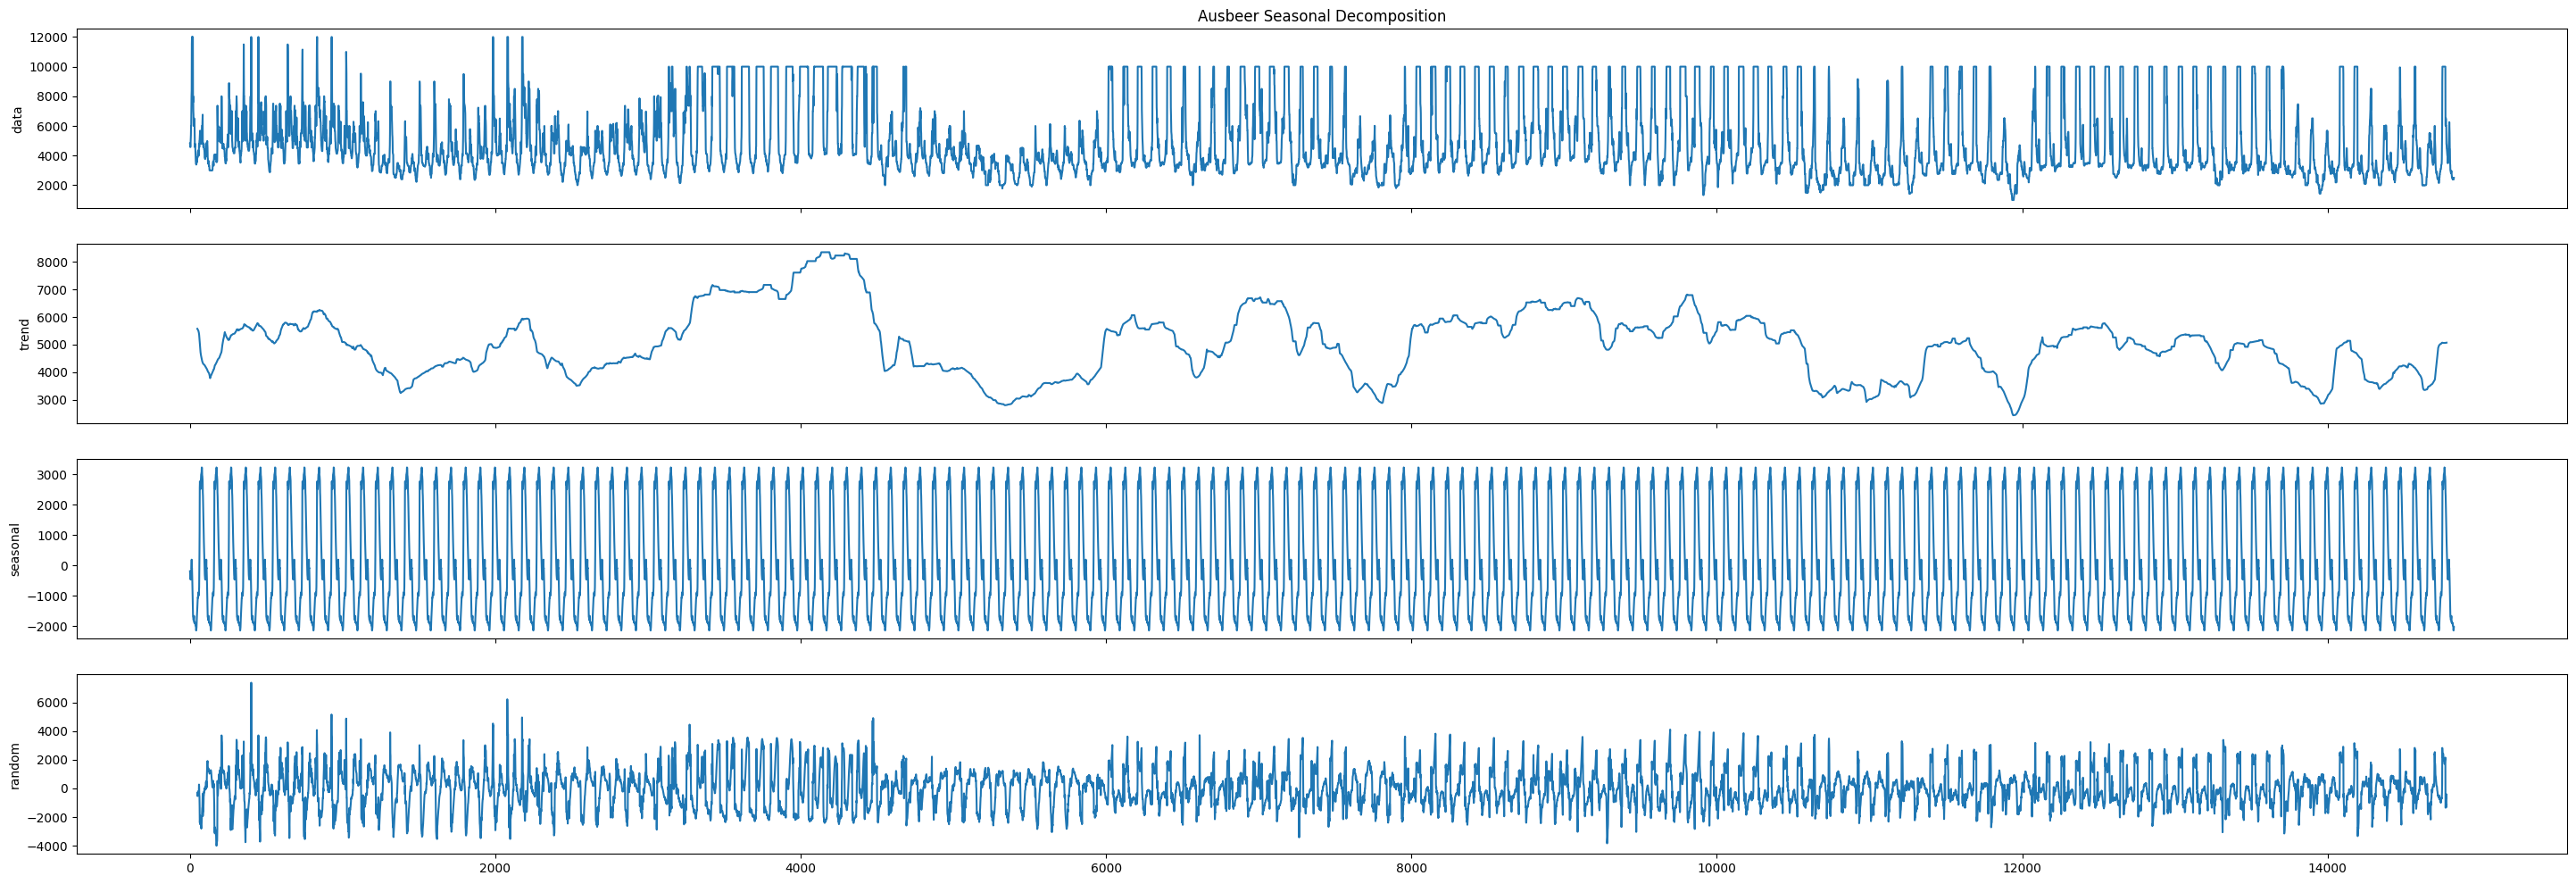

In [13]:
figure_kwargs = {'figsize': (36, 12)} 

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("Ausbeer Seasonal Decomposition")